In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d warcoder/mango-leaf-disease-dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip -qq mango-leaf-disease-dataset.zip

unzip:  cannot find or open mango-leaf-disease-dataset.zip, mango-leaf-disease-dataset.zip.zip or mango-leaf-disease-dataset.zip.ZIP.


In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124249 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124250 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124252 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124253 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124256 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124301 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124302 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124305 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124306 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124310 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124312 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124334 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124336 (Cust

In [ ]:
import os, shutil, pathlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory

Preprocessing data


In [ ]:
original_dir = pathlib.Path("MangoLeafBD Dataset")
new_base_dir = pathlib.Path("MangoLeafBD_Dataset_enhanced")
os.mkdir("MangoLeafBD_Dataset_enhanced")
os.mkdir("MangoLeafBD_Dataset_enhanced/train")
os.mkdir("MangoLeafBD_Dataset_enhanced/test")
os.mkdir("MangoLeafBD_Dataset_enhanced/validation")


image_size = (224, 224)
batch_size = 128




for category in ("Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back",
                     "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"):
    os.mkdir(f"MangoLeafBD_Dataset_enhanced/train/{category}")
    os.mkdir(f"MangoLeafBD_Dataset_enhanced/test/{category}")
    os.mkdir(f"MangoLeafBD_Dataset_enhanced/validation/{category}")
    i = 0;
    for file in os.listdir(f"MangoLeafBD Dataset/{category}"):
        path = f"MangoLeafBD Dataset/{category}/{file}"
        if i < 300:
            shutil.move(path, f"MangoLeafBD_Dataset_enhanced/train/{category}")
            i += 1
        elif i >= 300 and i < 400:
            shutil.move(path, f"MangoLeafBD_Dataset_enhanced/test/{category}")
            i += 1
        else:
            shutil.move(path, f"MangoLeafBD_Dataset_enhanced/validation/{category}")
            i += 1

In [ ]:
train_dataset = image_dataset_from_directory(
    "MangoLeafBD_Dataset_enhanced/train",
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical')
validation_dataset = image_dataset_from_directory(
    "MangoLeafBD_Dataset_enhanced/validation",
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical')
test_dataset = image_dataset_from_directory(
    "MangoLeafBD_Dataset_enhanced/test",
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical')

Found 2400 files belonging to 8 classes.
Found 800 files belonging to 8 classes.
Found 800 files belonging to 8 classes.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (128, 224, 224, 3)
labels batch shape: (128, 8)


In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(8, activation="softmax")(x)  # Указываем 8 выходных нейронов
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                        

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="01_convnet_from_scratch.hdf5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
19/19 [==============================] - 335s 18s/step - loss: 1.9161 - accuracy: 0.2229 - val_loss: 1.5934 - val_accuracy: 0.3313
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 312s 16s/step - loss: 1.5221 - accuracy: 0.3658 - val_loss: 1.6717 - val_accuracy: 0.3875
Epoch 3/30
19/19 [==============================] - 313s 16s/step - loss: 1.3902 - accuracy: 0.4625 - val_loss: 1.3880 - val_accuracy: 0.4487
Epoch 4/30
19/19 [==============================] - 314s 17s/step - loss: 0.9667 - accuracy: 0.6617 - val_loss: 0.7883 - val_accuracy: 0.6913
Epoch 5/30
19/19 [==============================] - 322s 17s/step - loss: 0.7005 - accuracy: 0.7379 - val_loss: 0.5197 - val_accuracy: 0.8112
Epoch 6/30
19/19 [==============================] - 315s 17s/step - loss: 0.4394 - accuracy: 0.8413 - val_loss: 0.5131 - val_accuracy: 0.8263
Epoch 7/30
19/19 [==============================] - 320s 17s/step - loss: 0.3775 - accuracy: 0.8792 - val_loss: 0.4918 - val_accuracy: 0.8438
Epoch 8/30
19/19 [==============================] - 313s 17s/step - loss: 0.2724 - accuracy: 0.9058 - val_loss: 0.3889 - val_accuracy: 0.8600
Epoch 9/30
19/19 

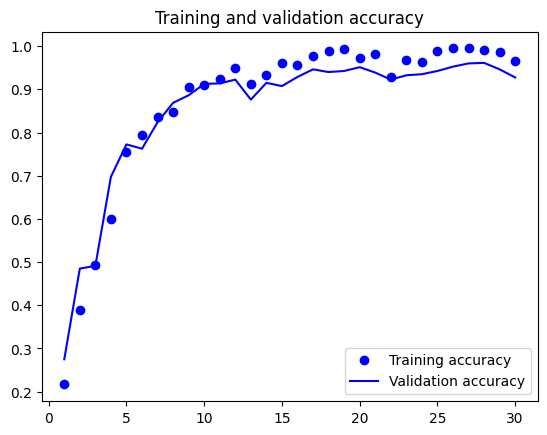

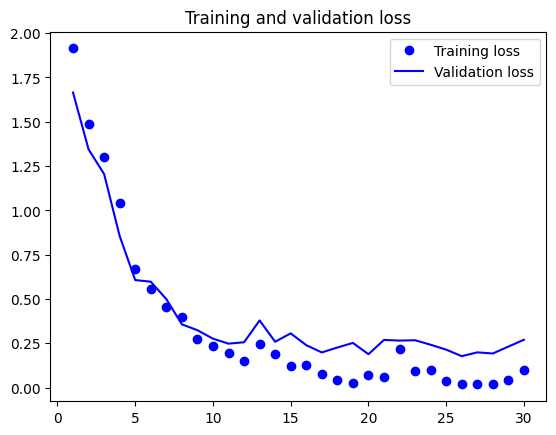

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Добавляем аугментацию

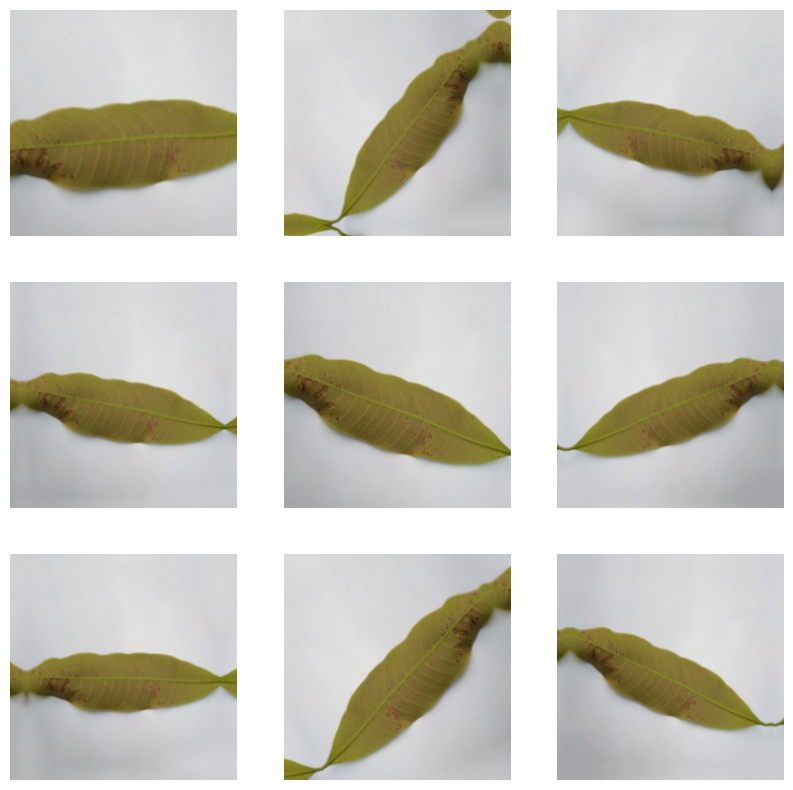

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(8, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="02_convnet_from_scratch_with_augmentation.hdf5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
19/19 [==============================] - 429s 22s/step - loss: 1.9113 - accuracy: 0.2129 - val_loss: 1.5497 - val_accuracy: 0.3825
Epoch 2/100
19/19 [==============================] - 397s 21s/step - loss: 1.4872 - accuracy: 0.4038 - val_loss: 1.3977 - val_accuracy: 0.4663
Epoch 3/100
19/19 [==============================] - 400s 21s/step - loss: 1.0877 - accuracy: 0.6200 - val_loss: 0.8903 - val_accuracy: 0.6750
Epoch 4/100
19/19 [==============================] - 395s 21s/step - loss: 0.8386 - accuracy: 0.6825 - val_loss: 0.6637 - val_accuracy: 0.7513
Epoch 5/100
19/19 [==============================] - 412s 21s/step - loss: 0.5907 - accuracy: 0.7817 - val_loss: 0.5470 - val_accuracy: 0.7775
Epoch 6/100
19/19 [==============================] - 404s 21s/step - loss: 0.5197 - accuracy: 0.8079 - val_loss: 0.4196 - val_accuracy: 0.8425
Epoch 7/100
19/19 [==============================] - 404s 21s/step - loss: 0.4308 - accuracy: 0.8396 - val_loss: 0.3234 - val_accuracy: 0.8875

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
    "02_convnet_from_scratch_with_augmentation.hdf5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

Берем предобученную модель

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3),
    classes=8,
    classifier_activation="softmax")
conv_base.summary()


In [ ]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

In [ ]:
inputs = keras.Input(shape=(7, 7, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(8, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="03_feature_extraction.hdf5",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()